- <font size = 6><b>Lec01. 딥러닝 기초

# TensorFlow & Keras
- TensorFlow : 구글에서 만든 기계학습 라이브러리
    - ref : https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ko
- Keras : 텐서플로우에서 딥러닝 관련 핵심 구성 요소를 제공하는 라이브러리
    - ref : https://keras.io/api/models/model/
- PYTORCH : 이미지 분석에 특화됨, TensorFlow보다 간단하게 이루어져있음


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, KFold, StratifiedKFold
from sklearn.metrics import auc, mean_squared_error, mean_squared_log_error, accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, label_binarize

from keras import models, layers, Sequential
from keras.layers import Dense, Activation
from keras.initializers import GlorotNormal

- <b>keras.layers.Dense(
    units,
    activation=None,</b>
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)

In [3]:
df = pd.read_csv('../ML/datasets/iris.csv')
df.head()

,sl,sw,pl,pw,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
y = df['target']
X = df.drop(['target'], axis=1)

## sparse_categorical_crossentropy
* target값이 int인 경우 : sparse_categorical_crossentropy
- 예 : 0,1,2,3,4,5,6,7,8,9 같은 느낌

In [6]:
X_train,X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=11, stratify=y)
X_train.shape,X_test.shape, y_train.shape, y_test.shape
print(y_train[:5])

8      0
23     0
101    2
49     0
111    2
Name: target, dtype: int64


## categorical_crossentropy
* target값이 categorical(one-hot)인 경우 : categorical_crossentropy
- binary : 2종
- categorical : 3종 이상

In [7]:
yc = pd.get_dummies(y)
print(yc[:5])

from keras.utils import to_categorical
yc2 = to_categorical(y, num_classes=3, dtype='int')
print(yc2[:5])


   0  1  2
0  1  0  0
1  1  0  0
2  1  0  0
3  1  0  0
4  1  0  0
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [8]:
X_train,X_test, y_train, y_test = train_test_split(X, yc , test_size=0.2, random_state=11, stratify=y)
X_train.shape,X_test.shape, y_train.shape, y_test.shape
print(y_train[:5])
X_train.shape,X_test.shape, y_train.shape, y_test.shape

     0  1  2
8    1  0  0
23   1  0  0
101  0  0  1
49   1  0  0
111  0  0  1


((120, 4), (30, 4), (120, 3), (30, 3))

In [9]:
X_train.head()

,sl,sw,pl,pw
8,4.4,2.9,1.4,0.2
23,5.1,3.3,1.7,0.5
101,5.8,2.7,5.1,1.9
49,5.0,3.3,1.4,0.2
111,6.4,2.7,5.3,1.9


In [10]:
y_train.head()

,0,1,2
8,1,0,0
23,1,0,0
101,0,0,1
49,1,0,0
111,0,0,1


-----

In [11]:
model = models.Sequential()
# 입력층 ====================================================
model.add(layers.Dense(units = 10,input_dim = 4, activation = 'relu', kernel_initializer= GlorotNormal()
))
# 히든 레이어 ===============================================
model.add(layers.Dense(units = 6, activation = 'relu'))
model.add(layers.Dense(units = 6, activation = 'relu'))
# 출력 층 ===================================================
model.add(layers.Dense(units = 3, activation = 'softmax')) 

# target 값이 수치형(int)인 경우 :sparse_categorical_crossentropy 사용
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

# target이 범주형인 경우 : y_cat = pd.get_dummies(y)
# model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 6)                 66        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 3)                 21        
                                                                 
Total params: 179
Trainable params: 179
Non-trainable params: 0
_________________________________________________________________


In [13]:
from sklearn.model_selection import train_test_split
X = df.drop('target',axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1, stratify=y)

- <b>epochs</b>=100 -> 가중치 조정을 100번 하겠다

In [14]:
fit_history = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=100)
proba = model.predict(X_test)

Epoch 1/50
4/4 [==============================] - 1s 88ms/step - loss: 1.4277 - accuracy: 0.3333 - val_loss: 1.3692 - val_accuracy: 0.3333
Epoch 2/50
4/4 [==============================] - 0s 12ms/step - loss: 1.3392 - accuracy: 0.3333 - val_loss: 1.2844 - val_accuracy: 0.3333
Epoch 3/50
4/4 [==============================] - 0s 12ms/step - loss: 1.2555 - accuracy: 0.3333 - val_loss: 1.2089 - val_accuracy: 0.3333
Epoch 4/50
4/4 [==============================] - 0s 11ms/step - loss: 1.1843 - accuracy: 0.3333 - val_loss: 1.1419 - val_accuracy: 0.3333
Epoch 5/50
4/4 [==============================] - 0s 12ms/step - loss: 1.1195 - accuracy: 0.3333 - val_loss: 1.0902 - val_accuracy: 0.3333
Epoch 6/50
4/4 [==============================] - 0s 11ms/step - loss: 1.0748 - accuracy: 0.3333 - val_loss: 1.0508 - val_accuracy: 0.3333
Epoch 7/50
4/4 [==============================] - 0s 12ms/step - loss: 1.0367 - accuracy: 0.3333 - val_loss: 1.0240 - val_accuracy: 0.3333
Epoch 8/50
4/4 [===========

In [15]:
proba[:5]

array([[0.02054258, 0.31206268, 0.66739476],
       [0.39719355, 0.34476048, 0.258046  ],
       [0.15025592, 0.39392906, 0.45581502],
       [0.38806435, 0.351874  , 0.26006162],
       [0.38515443, 0.35295603, 0.26188958]], dtype=float32)

In [22]:
pred = np.argmax(proba,axis=1)
pred

array([2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 2], dtype=int64)

In [17]:
y_test.shape, pred.shape

((30,), (30,))

In [18]:
from sklearn.metrics import f1_score, confusion_matrix
print(f1_score(y_test,pred, average='macro'))
print(confusion_matrix(y_test,pred))

0.5555555555555555
[[10  0  0]
 [ 0  0 10]
 [ 0  0 10]]


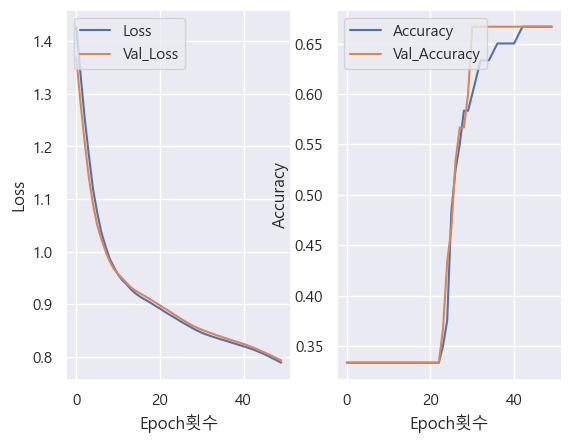

<Figure size 640x480 with 0 Axes>

In [19]:
ax1 = plt.subplot(1,2,1)
ax1.plot(fit_history.history['loss'])
ax1.plot(fit_history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch횟수')
plt.legend(['Loss', 'Val_Loss'], loc='upper left')

ax2 = plt.subplot(1,2,2)
ax2.plot(fit_history.history['accuracy'])
ax2.plot(fit_history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch횟수')
plt.legend(['Accuracy', 'Val_Accuracy'], loc='upper left')
plt.show()

plt.tight_layout()
plt.show()

In [23]:
model.evaluate(X_test,y_test)
# 가장 좋았던 학습 가져옴

1/1 [==============================] - 0s 31ms/step - loss: 0.7930 - accuracy: 0.6667


[0.7929853200912476, 0.6666666865348816]

In [24]:
proba = model.predict(X_test)

pred = np.argmax(proba, axis = 1)

1/1 [==============================] - 0s 23ms/step
